# The Numpy.Random Package

***

![Python & Jupyter](Images/python-jupyter-notebooks.jpg)

![Numpy](Images/Numpy.png)



######  <i> Pictures adapted from references 1,2  </i>

## Conor McCaffrey
#### Programming for Data Analysis 2021.
[Official Documentation for the Numpy Random Package](https://numpy.org/doc/stable/reference/random/index.html)  [3] <br>
[Click here for copy of Assignment](Images/ProgDA_Assignment.pdf)


***

## Assignment Objectives
- Explain the overall purpose of the package.
- Explain the use of the “Simple random data” and “Permutations” functions.
- Explain the use and purpose of at least five “Distributions” functions.
- Explain the use of seeds in generating pseudorandom numbers.

## What is the purpose of the Numpy.Random Package?

###### Overview of Numpy.
Prior to delving too deeply into the mechanics of a package, it is prudent to first understand the inherent purpose of a package. 
<br>
- <u> Numpy</u> (an abbreviation of "<b>Num</b>erical <b>Py</b>thon"  [4] ) is essentially " the fundamental package for scientific computing in Python " [5]. This open-source package provides many resources that are of particular importance to scientific computing. According to official documentation [5], Numpy is a "Python library that provides a multidimensional array object, various derived objects (such as masked arrays and matrices), and an assortment of routines for fast operations on arrays, including mathematical, logical, shape manipulation, sorting, selecting, I/O, discrete Fourier transforms, basic linear algebra, basic statistical operations, random simulation and much more". 
- The core of the Numpy package is the "array", which is similar to a list with the main exception being that we can perform mathematical operations/arithmetic functions on arrays that are not possible on lists [6]. Lists can contain data of differing data-types while arrays are used to house elements of the same data type [7]. Upon creation, an array has a fixed size (technically immutable) in where changing elements of an array will delete the original and return a copy of the original array with whatever operation you requested, in contrast to lists, which are mutable [8,5].

![Arrays](Images/arrays.png)
###### Adapted from reference 32.

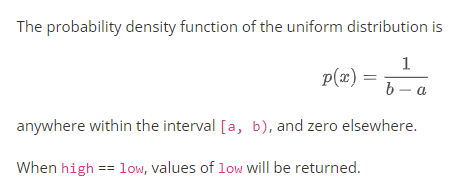


<a id='so_how_does_this_tie_in_to_the_Numpy.Random_Package?'></a>

###### So how does this tie in to the Numpy.Random Package?



Now that we have a basic overview of the Numpy package as a whole, let's examine the mechanics of the Numpy.Random package. At the highest level, the Numpy.Random package allows the production of arrays of "pseudo-random" numbers for downstream analyses [3]. This is acheived using what are known as a "BitGenerator" and a "Generator" [3]. BitGenerators create sequences of 32/64 random bits (based on different algorithms) which are then leveraged by Generators (taking a bit generator as an argument) to create sequences of numbers, adhering to a certain probability distribution (i.e Uniform, Normal or Binomial) [3,9]. The Generator (replacing the legacy RandomState) from the latest update of Numpy.Random uses bits provided by PCG-64 (Permuted Congruential Generator, a family of algorithms) as opposed to the legacy MT19937 (Marsenne Twister) due to enhanced statistical performence [3,10,11]. This will be covered in greater detail in the section discussing "Seeding". "Seeding" is an important concept, allowing the work to be reproducible to others attempting to examine/re-create your work.

###### In Summary...
The Numpy.Random package contains functions that facilitate the generation of arrays of pseudo-random numbers with specific probability distributions [12,13]. 

***
## Simple Random Data and Permutations
***

In this passage I want to give an overview of "Simple Random Data" and "Permutations", as outlined in the official documentation [3]. 
<br>

The Simple Random Data section outlines a set of functions that can be utilised in order to, logically, generate simple random data based on user inputs, which can of course be modified. Data types that can be returned include integers, floats, random samples from a given array and bytes [3]. The functions available for use, following the latest update, are:
- integers(low[, high, size, dtype, endpoint]) - Return random integers from low (inclusive) to high (exclusive), or if endpoint=True, low (inclusive) to high (inclusive).
- random([size, dtype, out]) - Return random floats in the half-open interval [0.0, 1.0).
- choice(a[, size, replace, p, axis, shuffle]) - Generates a random sample from a given array
- bytes(length) - Return random bytes.

Permutations (coming from the word <i> permute</i> (meaning to "alter/rearrange" [14]), meanwhile, create random re-arrangements of the order of elements [3]. Three functions are called out in the official documentation [3]:
- shuffle(x[, axis]) - Modify an array or sequence in-place by shuffling its contents.
- permutation(x[, axis] - Randomly permute a sequence, or return a permuted range.
- permuted(x[, axis, out]) -Randomly permute x along axis axis.

We will cover each of these in more detail below.

In [1]:
# To begin, let's import the packages we will require
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.special as sps  

# This  line-orientated magic command, as outlined in lectures, lets us display plots inline
%matplotlib inline

###### Numpy.Random: numpy.random.Generator.integers




This is the variable "a": 
 [3 1 0 6 0 2 5 1 7 2 0 6 0 1 0] 
 The type of the variable is: <class 'numpy.ndarray'>


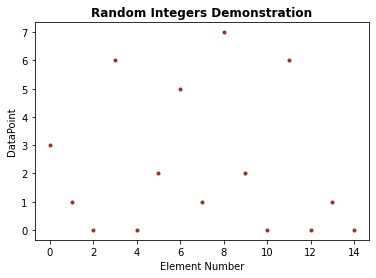

In [2]:
# Generate an array of integers
rng = np.random.default_rng() # Call default_rng to get a new instance of a Generator, from official documentation [3]
a =  rng.integers(8, size=15) # Up to but not including 8. Size is the shape of the array
print('This is the variable "a": \n' , a, '\n The type of the variable is:', type(a)) 

# Plot our variable to demonstrate random data, adapted from reference 15
plt.plot(a, 'b.', color = '#943126') # setting colour of datapoints [16]
plt.title('Random Integers Demonstration', fontweight='heavy',  size=12) # Setting title and weight of title [18]
plt.xlabel('Element Number', size=10) # Setting axis title and font size
plt.ylabel('DataPoint', size=10)
plt.grid(False) # Used hex value for colour [19]

In [3]:
# Further manipulation of the integer function.
# Generate a multi-dimensional array.

# Size is structured as the following: 2x4 array
b =  rng.integers(10, size=(2, 4))
print('This is b: \n' , b)

# Output is a 1D array
c = rng.integers(low = 0, high = 7, size = 10) 
print ('This is c: \n', c)

# Specifying multiple parameters
d =  rng.integers(5, size=(5,2),  endpoint=True) # Boolean True to determine if '5' included in arrays
print('This is d: \n', d)

# Wrapping empty function in try except block to investigate effect [17]
try:
    rng.integers()
except BaseException as err:
    print('This has caused an error')
else:
    print('Function still worked')


This is b: 
 [[5 6 1 8]
 [1 1 9 7]]
This is c: 
 [0 3 5 6 1 0 2 2 1 0]
This is d: 
 [[5 3]
 [4 0]
 [5 1]
 [5 1]
 [0 2]]
This has caused an error


Text(0.5, 1.0, 'Random integers from the discrete uniform distribution')

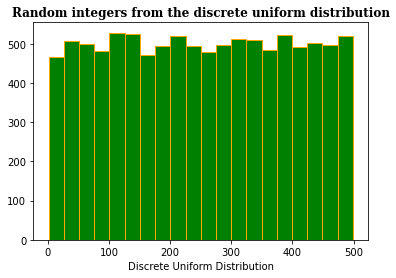

In [4]:
# Plotting using the numpy.random.Generator.integers function
x1 = rng.integers(low = 1, high=500, size = 10000) # generating random values between 1-499
plt.hist(x1, bins = 20, color = 'green', edgecolor = 'orange') # Some decorations
plt.xlabel('Discrete Uniform Distribution')
plt.title('Random integers from the discrete uniform distribution', fontweight = 'heavy', family = 'serif')


We have shown here that the distribution of the values is uniform, as detailed in the official documentation. [20]

###### Numpy.Random: numpy.random.Generator.random


This function is quite similar to the one above and is desribed in the official documentation as the following: [21]

![Random.random](Images/Random.random.PNG)


array([0.16929191, 0.79683339, 0.33538167, 0.28439053, 0.86692949,
       0.07487405, 0.21028822, 0.42715461, 0.65855085, 0.50748213,
       0.67314021, 0.47062063, 0.77653477, 0.05067004, 0.67258943,
       0.30237614, 0.2563719 , 0.71792943, 0.39743202, 0.53358989])

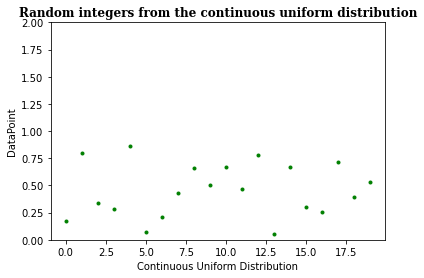

In [5]:
# Plotting using the numpy.random.Generator.random function
# This function returns floats
x2 = rng.random(size = 20) # 10 random floats
plt.plot(x2, 'b.', color = 'green') # Some decorations
plt.ylim(0,2.0) # setting x-axis limits
plt.ylabel('DataPoint')
plt.xlabel('Continuous Uniform Distribution')
plt.title('Random integers from the continuous uniform distribution', fontweight = 'heavy', family = 'serif')
x2

Something intersting to note here is how the generated random numbers are all between 0.0 and 1.0. I examined this by purposefully setting the upper x-limit to 2.0 just to determine if a result above 1.0 appeared. This is evidence that the statement from the official documentaion (half-open interval) is true [21].

There is an interesting difference in the above functions I want to highlight. It is obvious how Numpy.integers returns integer values and how Numpy.random can return float values. Something I feel is more important to highlight between the functions is the difference between discrete and continuous distribution as a result of these mechanics. Random.integers returns values of discrete uniform distribution (where there are a finite number of outcomes), while Random.random returns values of continuous uniform distribution(where there are an infinite number of outcomes) [22]. 

- Thinking of this logically, if you flip a coin, you can have only two possible outcomes: Heads or Tails (i.e 1 or 0). While the outcome is random (you hope!), you can only have two possible outcomes (i.e a finite amount of outcomes). This is the basis of discrete distribution. [23] 
- Compare this to continuous distribution, where we could have an infinite number of equally likely outcomes. An example of this could be an truely random number generator, in where any value could appear just as likely as any other value an infinite number of times.

![Coin](Images/Coin.jpg)

###### <i> Adapted from Reference 24 </i>


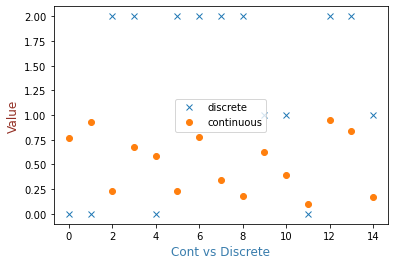

In [6]:
# Compare the two functions used in a scatterplot 
# Demonstate the difference between continuous and discrete uniform distribution.
x3 = rng.integers(low = 0, high=3, size = 15) 
x4 = rng.random(size = 15) 

plt.plot(x3, 'x', label='discrete')
plt.plot(x4, 'o', label='continuous')
plt.xlabel('Cont vs Discrete', size=12, color = '#397dad')
plt.ylabel('Value', size=12, color = '#943126')
plt.grid(False) # dont want gridlines for this
plt.legend()

We can clearly see from the above scatterplot the simple difference between discrete and continuous uniform distribution. For the Numpy.Random.Integers (discrete distribution) we only have the values 0,1 or 2 compared to Numpy.Random.random (continuous distribution) where we have random values between 0.0 and 1.0. 

###### Numpy.Random: numpy.random.Generator.choice


This function allows the user to generate a random sample from a non-empty array (if the variable is an array) or in the range of the specified integer [25]. 

In [7]:
# Initial investigations into choice method
rng = np.random.default_rng() 
a =  rng.choice(5) # generate a random integer
# Select 2 random arrays from list with replace set to False to avoid selecting same 
b = rng.choice(([11, 4, 8], [7, 4, 9], [1, 2, 9], [12,44,89]), 2 ,replace = False)
print('This is the variable a:' , a, '\n This is b:' ,b)

This is the variable a: 3 
 This is b: [[12 44 89]
 [ 7  4  9]]


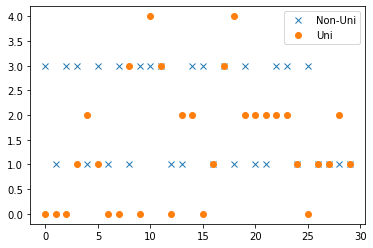

In [8]:
# Investigation into p parameter in choice method for distribution
# We will see a non-uniform distribution in a1 due to setting probabilities
a1 = rng.choice(5, 30, p=[0.0, 0.5, 0.0, 0.5, 0])  # adapted from reference 25
b1 = rng.choice(5, 30)

plt.plot(a1, 'x', label='Non-Uni')
plt.plot(b1, 'o', label='Uni')
plt.legend()

Lets explore this probability distribution parameter a little closer

In [9]:
# Generate a list of counties in Ulster who can win the Ulster Title for the next 40 years
counties = ['Cavan','Fermanagh','Monaghan','Tyrone','Donegal','Down','Antrim','Armagh','Derry']
ulsterTitle = rng.choice(counties, 40, p=[0.3, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.0], replace=True)  

# Return in numerical format how many times each county wins the title
unique_elements, counts_elements = np.unique(ulsterTitle, return_counts=True) 
print('How many times each county won the Ulster Title:') # adapted from reference 26
print(np.asarray((unique_elements, counts_elements))) # return as an array [27]

How many times each county won the Ulster Title:
[['Antrim' 'Armagh' 'Cavan' 'Donegal' 'Down' 'Fermanagh' 'Monaghan'
  'Tyrone']
 ['2' '7' '9' '3' '5' '3' '7' '4']]


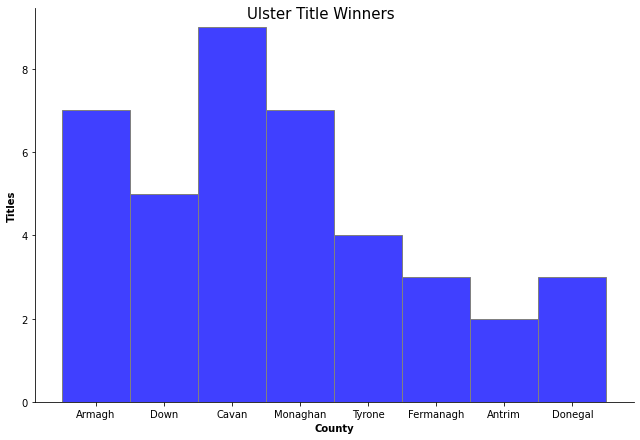

In [10]:
# Lets display on a Seaborn Histogram this glorious liklihood
# Took a long time to get aspect solution [28]
sns.displot(ulsterTitle, color = 'blue', edgecolor = 'grey', height=6, aspect=9/6)
plt.figsize = (170,100)
plt.xlabel('County', fontweight = 'bold')
plt.ylabel('Titles', fontweight = 'bold')
plt.suptitle('Ulster Title Winners', fontsize = 15) # adding main title to histogram and setting fontsize
plt.grid(False) 


In summary, the choice function selects a random sample or samples from an array, however we can manipulate the selection by setting probabilites.

###### Numpy.Random: numpy.random.Generator.bytes


This function simply returns random bytes [29]:
![Bytes](Images/Bytes.png)



In [11]:
# Returning Random bytes
np.random.bytes(12)

b'\x1eA\xb3oJ\x98\xd9\xc7\xe45xX'

###### Numpy.Random: numpy.random.Generator.shuffle


The shuffle method within Permutations facilitates the re-ordering of contents within a sequence [30]. 

![Shuffle](Images/shuffle.png)




In [12]:
# Shuffle method
input = np.arange(15)
rng.shuffle(input) # using shuffle method
print('1D array:', input) # printing array of shuffled results

# We can also manipulate the shape of the output 
new_input = np.arange(8).reshape((4, 2)) # resulting in a 4x2 array, adapted from [30]
rng.shuffle(new_input) 
print('We have now changed the shape of the output: \n', new_input)

# Let's look how specifying axis can alter the output 
arr = np.arange(8).reshape((4, 2))
rng.shuffle(arr, axis=1)
print('Setting the axis to 1: \n', arr) # alters results by column

1D array: [10  2 14  8  4  0  7 11  6  5  9  1 13 12  3]
We have now changed the shape of the output: 
 [[6 7]
 [0 1]
 [4 5]
 [2 3]]
Setting the axis to 1: 
 [[1 0]
 [3 2]
 [5 4]
 [7 6]]


It is also worth noting that when changing the value of the axis, the individual values within the axis do not change. Only the row/column as a whole changes. [30]

###### Numpy.Random: numpy.random.Generator.permutation

The permutation method within Permutations facilitates the re-ordering of contents within a sequence [32]. A notable difference between this method and the shuffle method is the permutation method returns a copy of the array while shuffle deals with the original array [33].

![Permutation](Images/Permutation.png)


In [13]:
# Permutation method
rng = np.random.default_rng()
result = rng.permutation(12)
print('1D array:', result ) # printing array of results in range of integer

# Similar to the shuffle function, we can also manipulate the shape of the output 
new_perm = np.arange(8).reshape((4, 2)) # resulting in a 4x2 array, adapted from [33]
rng.shuffle(new_perm) 
print('We have now changed the shape of the output: \n', new_perm)

1D array: [ 4 10  1  5  9  6 11  7  2  0  3  8]
We have now changed the shape of the output: 
 [[2 3]
 [0 1]
 [4 5]
 [6 7]]


In [14]:
# Let's explore this in-place/copy idea a little more

# If x is an array, make a copy and shuffle the elements randomly
original_List = [1,4,9,12,15]
permuted_List = np.random.permutation(original_List)
print('This is the original List before permutation:', original_List , 'and this is the permuted List:', permuted_List)
print('This is the original_List after permutation', original_List)

# Let's compare this to the shuffle function
original_shuffled_List = [1,2,3,4,5]
print('This is the List before shuffling:',original_shuffled_List)
print('This is the original_shuffled_List after shuffling', original_shuffled_List)


This is the original List before permutation: [1, 4, 9, 12, 15] and this is the permuted List: [12 15  1  9  4]
This is the original_List after permutation [1, 4, 9, 12, 15]
This is the List before shuffling: [1, 2, 3, 4, 5]
This is the original_shuffled_List after shuffling [1, 2, 3, 4, 5]


###### Numpy.Random: numpy.random.Generator.permuted
The permutation method within Permutations facilitates the permutation of 'x' along the axis <i>axis</i> [34]. A notable difference between this method and the shuffle method is eacxh slice in the permutated method is shuffled independently of the others.[34]


![Permuted](Images/Permuted.png)

Let's explore this.

In [15]:
# Generating a test instance [34]
rng = np.random.default_rng()
# Creating an array
array_1 = np.arange(1,21).reshape(5, 4)
print('This is the original array: \n' , array_1)
array_2 = rng.permuted(array_1, axis=1)
print('This is the permuted array: \n' , array_2) # the rows have been shuffled with the original unchanged
array_3 = rng.permuted(array_1, axis=0)
print('This is the permuted array setting axis=0:\n' , array_3) #columns shuffled with the original unchanged
print('Back to original:\n', array_1)
# We can set 'out=array_1' to change the original (in-place change as opposed to copy change)
rng.permuted(array_1, axis=1, out=array_1)
print('This is now array_1 after setting parameter for "out":\n',array_1)


This is the original array: 
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
This is the permuted array: 
 [[ 2  1  4  3]
 [ 6  7  8  5]
 [12 11 10  9]
 [14 15 13 16]
 [17 18 20 19]]
This is the permuted array setting axis=0:
 [[ 1  6  7 16]
 [17 10  3 12]
 [13 14 19  4]
 [ 9  2 15 20]
 [ 5 18 11  8]]
Back to original:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]
 [13 14 15 16]
 [17 18 19 20]]
This is now array_1 after setting parameter for "out":
 [[ 4  1  2  3]
 [ 6  5  7  8]
 [12 10  9 11]
 [13 16 14 15]
 [17 20 18 19]]


***
## Distributions
***


There are over 36 different distribution functions listed in the official documentation [3]. At it's most basic, a probability distribution 'is a table or an equation that links each outcome of a statistical experiment with its probability of occurrence' [35]. 
<br>
<br>
Let's take an extremely basic example of a footballer taking a penalty. There are two possible options here: the player either scores a goal or misses. Suppose the player takes two penalites (let's pretend the goalkeeper came off the line too early), there are four possible resulting outcomes (S= Scores, M= Misses) : SS, MM, SM, MS. The random variable X will represent the number of times the footballer scores and can be calculated. We can see visually that in 3 of the 4 possible outcomes the player scores at least once. We can display the probabilities of each outcome in the following table i.e. the <b>probability distribution</b>: 
<br>


   | Number of Goals  | Probability    |
|:-------------|:-----------|
| 0 | 0.25       | 
| 1  | 0.5    |
| 2  | 0.25    |

<i>Table Adapted from Reference 36</i>

A <b>cumulative probability</b>, meanwhile, denotes the liklihood that a random variable will fall within a certain specified range [35]. Going back to our earlier example, we can investigate the likehood of a player scoring one or less penalties. So this would be investigating the liklihood of the player scoring one penalty <u>and</u> the likehood of the player missing both penalties.

P(X ≤ 1) = P(X = 0) + P(X = 1) = 0.25 + 0.50 = 0.75
 
Now that we have a basic understanding of probabilities and distributions, let's delve a little deeper into the Distribution functions for generating random samples in Numpy.

###### Numpy.Random: random.Generator.uniform

Uniform distribution is perhaps the best distribution to initially describe as it can be considered the simplest. This form of distribution depicts an outcome where each value of a random variable is just as equally probable to any other value [38]. Thinking of this logically, lets imagine a deck of cards and you are asked to pick one. You are just as likely to draw a diamond as you are a heart and this is the same for a club and a spade. This is Uniform distribution [38]. We have already explored this topic in some detail above when describing the difference between Discrete Uniform distribution  (where there are a finite number of outcomes) and Continuous Uniform distribution (where there are an infinite number of outcomes) [22]. The probability density function (PDF), is a 'statistical expression describing the liklihood of an outcome', with the formula outlined below [39].


![Uniform Distribution](Images/uniform_Distribution.png)
***
![pdf](Images/pdf.PNG)


[1.33190344 1.55020195 1.96783131 1.20479482 1.72346309 1.25705068
 1.87412024 1.75009433 1.12959571 1.82690582 1.99549296 1.17927327
 1.59642848 1.9348919  1.1958592  1.5963093  1.34216495 1.63885695
 1.87181351 1.95787097 1.19592606 1.4527782  1.71741083 1.48516665
 1.9774428  1.91290926 1.64062171 1.86824731 1.40232145 1.18712037
 1.99344263 1.1919464  1.09820917 1.121713   1.48932011 1.0447117
 1.71785149 1.43321799 1.77692988 1.83380566 1.34505763 1.09957737
 1.68618375 1.05468318 1.15495676 1.62279941 1.0251039  1.30376566
 1.44795902 1.37355341 1.12307757 1.74609493 1.13889028 1.99898611
 1.08021595 1.29098195 1.69080062 1.02153674 1.44244721 1.22669111
 1.51920874 1.4537078  1.1991091  1.92712014 1.70105825 1.90704951
 1.12342249 1.26327211 1.51702535 1.40937942 1.2811696  1.33031264
 1.07943678 1.62334867 1.78962992 1.37633478 1.81214897 1.31638334
 1.07889273 1.8193273  1.62836733 1.15128234 1.99272466 1.03000427
 1.6624115  1.20938671 1.47616631 1.2709993  1.44559078 1.88732

Text(0.5, 1.0, 'Uniform Distribution')

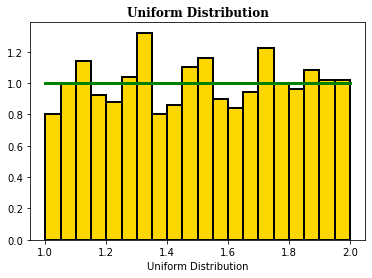

In [16]:
# Lets explore Uniform distribution
u = np.random.default_rng().uniform(1,2,1000)  # Grabbing 500 random values from 1 to 1.99999999. 
print(u,'\n', type(u)) # lets print our values and see what type of result is returned.
# Below lines adapted from official documentation [37]
count, bins, ignored = plt.hist(u, bins = 20, color = 'gold', edgecolor = 'black', density=True, linewidth=2) 
plt.plot(bins, np.ones_like(bins), linewidth=3, color='green') # Adapted from Reference 40
plt.xlabel('Uniform Distribution')
plt.title('Uniform Distribution', fontweight = 'heavy', family = 'serif')


We can see from the above result the Uniform function returns values within the specified range and in the form of a numpy array with the probability density function of 1.0. 

In [17]:
# Lets see what happens when we potentially input values incorrectly
u2 = np.random.default_rng().uniform(2,1,50) # our 'Low' limit is above out 'high' limit
u2

array([1.91526826, 1.66344711, 1.92966406, 1.93676662, 1.00099495,
       1.19694058, 1.86928092, 1.23493135, 1.46873813, 1.80934955,
       1.65054042, 1.59253001, 1.38658498, 1.61429035, 1.14657435,
       1.93367552, 1.62369144, 1.51413207, 1.3337887 , 1.79086436,
       1.22507597, 1.5324992 , 1.9899233 , 1.31037504, 1.57693618,
       1.81743089, 1.09302921, 1.05611848, 1.48859722, 1.35097332,
       1.71665111, 1.10679607, 1.54008689, 1.23222356, 1.91461307,
       1.33860012, 1.51073781, 1.06506271, 1.44946355, 1.1406318 ,
       1.67231121, 1.41618872, 1.98967291, 1.61374882, 1.38035094,
       1.62875523, 1.869073  , 1.15378343, 1.16729743, 1.73103656])

Surprisingly, this function still returns values however we obviously cannot trust them as we have set the inputs incorrectly. Further research into this finding revealed than an earlier version of Numpy accounted for this eventuality and included the following note [41]: 

![highLow](Images/highLow.PNG)

***


######  Numpy.Random: random.Generator.normal


Normal distribution (also referred to as Gaussian distribution) is a probability distribution that is perhaps most commonly seen in everyday life. The characteristic shape of the probability density function of the Normal distribution is a bell-curve, depicting the fact that data near the mean occurs more often that data farther than the mean [42,43]. In a Normal distribution, '68% of the observations are within +/- one standard deviation of the mean, 95% are within +/- two standard deviations, and 99.7% are within +- three standard deviations'[42]. 
<br>
Normal distribution is perhaps the most commonly known form of distriubtion due to the fact many observations follow a Gaussian distibution, including [44]:
-  Height
-  blood pressure
-  Exam Results

In the Numpy package, <i>loc</i> refers to the mean of the distribution and <i>scale</i> refers to the standard deviation [43].

![Normal](Images/normal.png)


In [18]:
# Investigating the Normal distribution function
mu, sigma = 0, 0.2 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 1000)

The mean (mu) of the values is: 0 and the standard deviation(sigma) is: 0.2


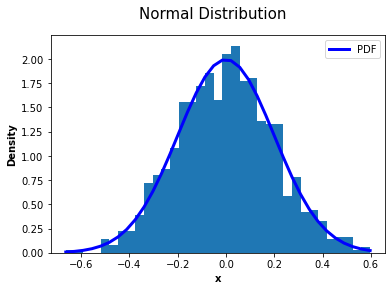

In [19]:
# Plotting the resulting random variables
count, bins, ignored = plt.hist(s, 35, density=True) # adapted from Reference 43.
# The below lines of code is filling in input values for the probability density as outlines in Reference 43.
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) *
               np.exp( - (bins - mu)**2 / (2 * sigma**2) ),
         linewidth=3, label= 'PDF', color='blue') # pdf = Probability Density Function
plt.xlabel('x', fontweight = 'bold')
plt.ylabel('Density', fontweight = 'bold')
plt.suptitle('Normal Distribution', fontsize = 15)
plt.legend()
print('The mean (mu) of the values is:', mu , 'and the standard deviation(sigma) is:', sigma)

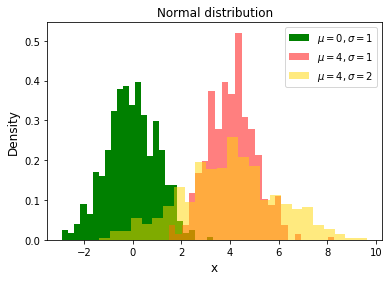

In [20]:
# Lets generate an array of values and investigate altering parameters
mu1, sigma1 = 0, 1
s1 = np.random.default_rng().normal(mu1, sigma1, 500)
plt.hist(s1, bins=25, density=True, label='$\mu=0, \sigma=1$', color = 'green') # Lettering adapted from Reference 45.

# Lets alter the mean value
mu2, sigma2 = 4, 1
s2 = np.random.default_rng().normal(mu2, sigma2, 500)
# changing alpha to alter transparency [46]
plt.hist(s2, bins=25, alpha = 0.5, density=True, label='$\mu=4, \sigma=1$', color = 'red')

# Lets alter the standard deviation 
mu3, sigma3 = 4, 2
s3 = np.random.default_rng().normal(mu3, sigma3, 500)
plt.hist(s3, bins=25, density=True, alpha=0.5, label='$\mu=4, \sigma=2$', color = 'gold') 

# Lets overlay our plots
plt.xlabel('x', size=12)
plt.ylabel('Density', size=12)
plt.title('Normal distribution', size=12)
plt.legend()


We can clearly see how changing each parameter drastically affects the resulting array of values. In the first histogram, the peak of the curve is centered around zero while in the second histogram the values are concentrated around 4. Altering the standard deviation, as specifed in the third histogram, results in a much greater 'spread' of value distribution. 

***

###### Numpy.Random:  random.Generator.poisson


At it's most basic, a Poisson distribution can be used to estimate the probability of a certain event occurring within a fixed-time interval [47]. In everyday use, Poisson distributions are used to estimate the 'number of car crashes in a city of a given size' [47]. Other common questions that can be answered using a Poisson distribution is the numbers of books sold in a week, number of storms in a city over a given time period [50]. 

![Poisson](Images/poisson.png)
<i>Adapted from Reference 48</i>


In Numpy, the Poisson function contains the <i>lam (lambda)</i> parameter, which is the 'expected number of events occurring in a fixed-time interval' [49]. As the value of <i>lambda</i> changes, the probability of the number of events occuring within a defined time interval also changes [49].


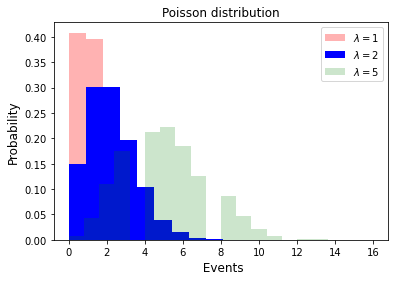

In [21]:
# Exploration of the Poisson function

rng = np.random.default_rng()  # Generate some random values

# Let's change the value for lambda
p = rng.poisson(1, 10000) # setting lam to 1.0, with 10000 values
plt.hist(p, bins = 10, density = True, alpha = 0.3, color = 'red', label='$\lambda=1$')
p1 = rng.poisson(2, 10000) # setting lam to 2.0, with 10000 values
plt.hist(p1, bins = 10, density = True,alpha = 1.0, color = 'blue', label='$\lambda = 2$')
p2 = rng.poisson(5, 10000) # setting lam to 5.0, with 10000 values
plt.hist(p2, bins = 20, density = True, color = 'green', alpha = 0.2, label='$\lambda = 5$')

# Lets overlay our plots
plt.xlabel(' Events', size=12)
plt.ylabel('Probability', size=12)
plt.title('Poisson distribution', size=12)
plt.legend()

Upon examination, we can see that the probability of an event occuring reaches it's peak as it approaches <i>lambda</i>.
***

###### Numpy.Random:  random.Generator.pareto

At it's most basic, the Pareto principle details an unequal relationship between inputs and outputs, in where 80% of the consequences comes from 20% of the causes [51]. For this reason, it's also known as the '80/20 Rule' [51]. In everyday terms, we can relate this to an example of a company where 20% of the products a company sells generates 80% of the company's profits. Historically, this observation came from the Italian economist
[Vilfredo Pareto](https://www.econlib.org/library/Enc/bios/Pareto.html) who calculated that 80% of Italian wealth was owned by 20% of the population [52]. 

![Pareto](Images/pareto.png) <i>Adapted from Reference 53</i>

In Numpy, there are two parameters for the pareto function: <i>a</i>, which denotes the shape of the distribution and must be positive and <i> size</i>, which denotes the shape of the output [53]. The pareto distribution is obtained by adding 1 and multiplying by the scale parameter <i> m </i>.
    
![Par_dist](Images/par_dist.png) <i>Adapted from Reference 53</i>


In [22]:
# Lets explore the Pareto distribution
a, m = 4., 4.  # shape and mode as detailed in Reference 53
par = (np.random.default_rng().pareto(a, 1000) + 1) * m # generating random values based on pareto

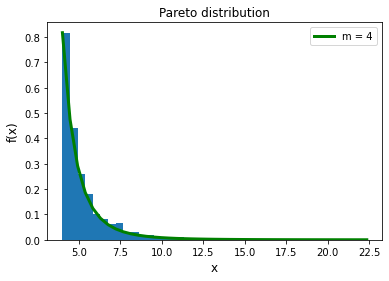

In [23]:
count, bins, _ = plt.hist(par, 40, density=True) # setting variables as per official documentation [53]
fit = a*m**a / bins**(a+1)
plt.plot(bins, max(count)*fit/max(fit), linewidth=3, color='green', label = 'm = 4' )

plt.xlabel('x', size=12)
plt.ylabel('f(x)', size=12)
plt.title('Pareto distribution', size=12)
plt.legend()



As can be deduced from the initial introduction to Pareto distribution, we can see here the spread of a range of values within Pareto distribution. In contrast to the distributions we have examined so far where there is a 'central peak' in the data, we see here that the majority of values fall within the initial 20% range with a corresponding tailing-off for the remaining values. This 'tailing-off' phenomenon is also known as the Pareto Index or the slope [54]. 



***
##### Numpy.Random:  random.Generator.gamma

In a nutshell, Gamma distribution (an aspect of the Poisson process) is primarily used to model the wait time until future events [55]. The difference between Gamma distribution and Exponential distribution is that Exponential distribution accounts for the <b>first event</b> while Gamma distribution models for the '<b>k-th</b>' event, where <i>'k'</i> denotes the shape and <i>'th'</i> denotes the scale (which accounts for where the majority of the observations will lie) [55,56]. Gamma distribution is used for continuous variables that have skewed distributions [57]. Skewness is a measure of the distortion of data from the normal distribution i.e the 'bell-shape' curve [58].

In everyday life, Gamma distributions can be used to model the following: 
- Rainfall Rates
- Life expectancies
- Failure of electronic componants 



![gamma.png](Images/gamma.png)
<i>Adapted from Reference 56</i>

In [24]:
# Generate our values
shape, scale = 2., 2.  # mean=4, std=2*sqrt(2)
g = np.random.default_rng().gamma(shape, scale, 500)

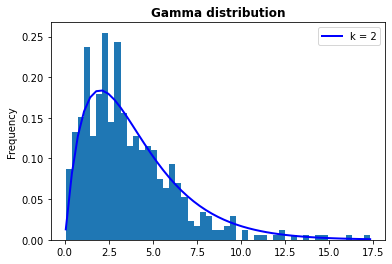

In [25]:
# Investigating Gamma distribution as per Official Documentation [56]
count, bins, ignored = plt.hist(g, 50, density=True)
y = bins**(shape-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape)*scale**shape))
plt.plot(bins, y, linewidth=2, color='blue', label = 'k = 2')  
plt.title('Gamma distribution', fontweight = 'bold')
plt.ylabel('Frequency')
plt.legend()


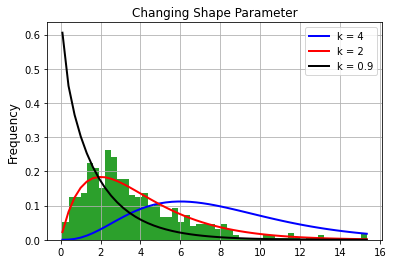

In [26]:
# Investigating the effect of altering the shape parameter
g1 = np.random.default_rng().gamma(shape, scale, 500)

# Changing shape value to 4
shape1, scale = 4., 2.  
count, bins, ignored = plt.hist(g1, 50, density=True)
y1 = bins**(shape1-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape1)*scale**shape1))
plt.plot(bins, y1, linewidth=2, color='blue', label = 'k = 4')  


# Changing shape value to 2
shape2, scale = 2., 2.  
count, bins, ignored = plt.hist(g1, 50, density=True)
y2 = bins**(shape2-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape2)*scale**shape2))
plt.plot(bins, y2, linewidth=2, color='red', label = 'k = 2')  

# Changing shape value to 0.9
shape3, scale = 0.9, 2. 
count, bins, ignored = plt.hist(g1, 50, density=True)
y3 = bins**(shape3-1)*(np.exp(-bins/scale) /  
                     (sps.gamma(shape3)*scale**shape3))
plt.plot(bins, y3, linewidth=2, color='black', label = 'k = 0.9')  

# Lets overlay our plots
plt.ylabel('Frequency', size=12)
plt.title('Changing Shape Parameter', size=12)
plt.legend()
plt.grid()


We can see that altering the shape parameter decreases the overall skew. A k-value of below 1 leads to an asymptotic distribution while as the value of <i>k</i> increases, the overall skew appears to decrease. 

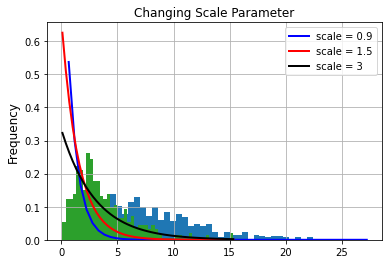

In [27]:
# Investigating the effect of altering the scale parameter
g2 = np.random.default_rng().gamma(shape1, scale, 500)

# Changing scale value to 0.9
shape1, scale1 = 1, 0.9 
count, bins, ignored = plt.hist(g2, 50, density=True)
y1 = bins**(shape1-1)*(np.exp(-bins/scale1) /  
                     (sps.gamma(shape1)*scale1**shape1))
plt.plot(bins, y1, linewidth=2, color='blue', label = 'scale = 0.9')  


# Changing scale value to 1.5
scale2 =  1.5 
count, bins, ignored = plt.hist(g1, 50, density=True)
y2 = bins**(shape1-1)*(np.exp(-bins/scale2) /  
                     (sps.gamma(shape1)*scale2**shape1))
plt.plot(bins, y2, linewidth=2, color='red', label = 'scale = 1.5')  

# Changing scale value to 3
scale3 = 3
count, bins, ignored = plt.hist(g1, 50, density=True)
y3 = bins**(shape1-1)*(np.exp(-bins/scale3) /  
                     (sps.gamma(shape1)*scale3**shape1))
plt.plot(bins, y3, linewidth=2, color='black', label = 'scale = 3')  

# Lets overlay our plots
plt.ylabel('Frequency', size=12)
plt.title('Changing Scale Parameter', size=12)
plt.legend()
plt.grid()

Again, we can see that altering the scale parameter decreases the overall skew.
<br>
To finish off this process, it is also important to highlight the difference between Gamma and Poisson distribution. Gamma distribution us used to model the wait until the k-th event whereas Poisson distribution is used to model the number of events that may occur in the future [59].

***
## The use of Seeds in generating Random Numbers
***

There have been some important changes in Seeding in the latest version of the Numpy.random package. I have highlighted some of the differences in Generators in the section [So how does this tie in to the Numpy.Random Package](#so_how_does_this_tie_in_to_the_Numpy.Random_Package?). 'Seeding', as discussed in the same earlier section, essentially allows work to be reproducible by controlling the set of 'random' numbers generated. Random State has been replaced by a 'Generator', which incorporates the use of an additional BitGenerator (using PCG64) that generates random bits [3,10]. These random bits are converted into random values by the action of the Generator[3,10,11].

![Random_Gen](Images/random_Gen.png)
<i>Adapted from Reference 60</i>

As can be seen from the official documentation [60], several parameters can be called for <i>seed</i>. The only thing here that may cause uncertainty is 'SeedSequence', which essentially 'mixes sources of entropy in a reproducible way to set the initial state for independent and very probably non-overlapping BitGenerators'[61]. Previous versions of Numpy used what is known as the 'Mersenne Twister' algorithm [10,11]. This has now been replaced by PCG-64 (Permuted Congruential Generator) due to enhanced performence [10,11,62]. In the official documentation, a table has been compiled detailing processing speeds for generating random values from different distributions [62]. Some striking differences appear in computing times (in nanoseconds) for generating values in Uniform distribution (MT19937:5.9 vs PCG64:3.1) , Gamma distribution (MT19937:37.2 vs PCG64:30.8) and Poisson distributions (MT19937:111.7 vs PCG64:103.4) [62]. PCG64 has also improved performance on different operating systems [62]. 

In [28]:
# Lets start generating some random float values
# Taken from Official Documentation [60]
rng = np.random.default_rng()
print(rng) # Verifying the Generator
r_float = rng.random()
print(r_float) # Print our float value
type(r_float) # Verify it is indeed a float


Generator(PCG64)
0.18856157373891547


float

In [29]:
# Generating integer values
# Low and High parameters are same as we have detailed throught (inclusive, exclusive)
rng = np.random.default_rng()
r_ints = rng.integers(low=0, high=5, size=2) # two values between 0 and 4
print(r_ints)
r1_ints = rng.integers(low=0, high=5, size=2) # two values between 0 and 4
print(r1_ints)

# Boolean to determine if both arrays are the same
r1_ints == r_ints

[2 0]
[3 3]


array([False, False])

We can see here we are generating arrays of different values. 

In [30]:
# Lets start seeding so that we get reproducible results
rng = np.random.default_rng(seed=10) # setting the seed value as 10
arr_1 = rng.random((5, 3)) # producing an array of results
print(arr_1) # printing the results

[[0.95600171 0.20768181 0.82844489]
 [0.14928212 0.51280462 0.1359196 ]
 [0.68903648 0.84174772 0.425509  ]
 [0.956926   0.82533291 0.33821531]
 [0.57576055 0.75330186 0.82710394]]


In [31]:
rng = np.random.default_rng(seed=10) # setting the seed value as 10
arr_2 = rng.random((5, 3))  # producing an array of results
print(arr_2) # printing the results

[[0.95600171 0.20768181 0.82844489]
 [0.14928212 0.51280462 0.1359196 ]
 [0.68903648 0.84174772 0.425509  ]
 [0.956926   0.82533291 0.33821531]
 [0.57576055 0.75330186 0.82710394]]


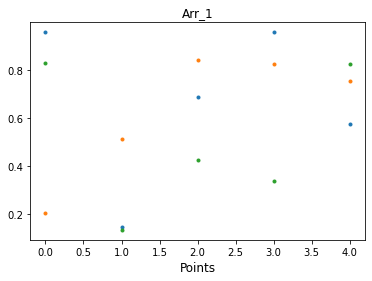

In [32]:
# Lets plot arr_1
plt.plot(arr_1, '.', label = 'arr_1')
plt.xlabel('Points', size=12)
plt.title('Arr_1', size=12)
plt.grid(False)

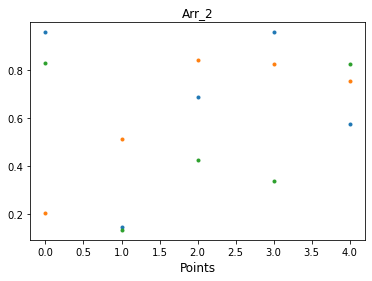

In [33]:
# Lets plot arr_2
plt.plot(arr_2, '.', label = 'arr_2')
plt.xlabel('Points', size=12)
plt.title('Arr_2', size=12)
plt.grid(False)

In [34]:
# Boolean to determine if both arrays are the same
arr_1 == arr_2

array([[ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True],
       [ True,  True,  True]])

What we see above is essentially the basis of Seeding. We have set the same seed for both arrays and then called the random module to provide an array of numbers for us. As we have set the same seed, the 'random' values returned for each array are exactly the same. This brings us nicely to the concept of 'pseudo-random' values. As the name suggests, 'pseudo-random numbers' are not inherently random. The random numbers generated by a computer are in fact 'pseudo-random', as they are generated by algorithms[3]. As we know, computers are deterministic in nature [63]. Using this logic, if we know the 'seed value' going to be used by an algorithm, we can predict the next 'random' value. This is what we have shown above. 

***
<br>

# References

1.  https://www.fiverr.com/naazneen_jatu/create-python-jupyter-notebooks 
2.  https://towardsdatascience.com/how-to-create-numpy-arrays-from-scratch-3e0341f9ffea
3. https://numpy.org/doc/stable/reference/random/index.html 
4. https://www.w3schools.com/python/numpy/numpy_intro.asp 
5. https://numpy.org/
6. https://numpy.org/doc/stable/user/whatisnumpy.html 
7.  https://medium.com/fintechexplained/why-should-we-use-numpy-c14a4fb03ee9 
8.  https://medium.com/backticks-tildes/list-vs-array-python-data-type-40ac4f294551
9.  https://datascienceparichay.com/article/how-to-remove-elements-from-a-numpy-array/
10. https://numpy.org/doc/stable/reference/random/bit_generators/index.html
11. https://www.pcg-random.org/index.html 
12. https://www.cryptologie.net/article/331/how-does-the-mersennes-twister-work/ 
13. https://pythonguides.com/python-numpy-random/ 
14. https://www.merriam-webster.com/dictionary/permute 
15. https://medium.com/analytics-vidhya/editing-data-visualization-in-python-64f42225ba21
16. DEV Community. Subplotting with matplotlib and seaborn. 
17. https://docs.python.org/3/tutorial/errors.html) 
18.  https://matplotlib.org/stable/tutorials/text/text_props.html 
19.  https://htmlcolorcodes.com/ 
20.  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers 
21.  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random
22.  https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
23.  https://www.shmoop.com/probability-statistics/discrete-continuous-data.html 
24.  https://thatsmaths.com/2016/12/22/twenty-heads-in-succession-how-long-will-we-wait/ 
25.  https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice 
26.  https://stackoverflow.com/questions/12282232/how-do-i-count-unique-values-inside-a-list 
27.  https://numpy.org/doc/stable/reference/generated/numpy.asarray.html 
28.  https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot 
29.   https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes 
30. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle   
31. https://ipython-books.github.io/13-introducing-the-multidimensional-array-in-numpy-for-fast-array-computations/ 
32. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation 
33. https://stackoverflow.com/questions/15474159/shuffle-vs-permute-numpy
34. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted
35. https://stattrek.com/probability-distributions/probability-distribution.aspx 
36. https://stackoverflow.com/questions/48655801/tables-in-markdown-in-jupyter
37. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform
38. https://www.investopedia.com/terms/u/uniform-distribution.asp
39. https://www.investopedia.com/terms/p/pdf.asp[
40. https://numpy.org/doc/stable/reference/generated/numpy.ones_like.html
41. https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html
42. https://www.investopedia.com/terms/n/normaldistribution.asp 
43. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal
44. https://www.mathsisfun.com/data/standard-normal-distribution.html
45. https://tex.stackexchange.com/questions/171211/mu-is-printing-the-greek-letter-mu-on-a-separate-single-line
46. matplotlib.org. Text properties and layout — Matplotlib 3.1.2 documentation.   
47. https://www.investopedia.com/terms/p/poisson-distribution.asp 
48. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson 
49. https://towardsdatascience.com/the-poisson-distribution-and-poisson-process-explained-4e2cb17d459 
50. https://studiousguy.com/poisson-distribution-examples/#6_Number_of_Books_Sold_per_Week 
51. https://www.investopedia.com/terms/p/paretoprinciple.asp[51]
52. https://betterexplained.com/articles/understanding-the-pareto-principle-the-8020-rule/
53. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.pareto.html#numpy.random.Generator.pareto 
54. https://www.definitions.net/definition/pareto+index 
55. https://towardsdatascience.com/gamma-distribution-intuition-derivation-and-examples-55f407423840 
56. https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.gamma.html#numpy.random.Generator.gamma 
57. https://www.mygreatlearning.com/blog/gamma-distribution/ 
58. https://www.investopedia.com/terms/s/skewness.asp 
59. https://towardsdatascience.com/gamma-distribution-intuition-derivation-and-examples-55f407423840#:~:text=Poisson%20distribution%20is%20used%20to,until%20the%20k%2Dth%20event.
60. https://numpy.org/doc/stable/reference/random/generator.html 
61. https://numpy.org/doc/stable/reference/random/bit_generators/generated/numpy.random.SeedSequence.html#numpy.random.SeedSequence 
62. https://numpy.org/doc/stable/reference/random/performance.html
63. https://www.techopedia.com/definition/602/deterministic-system
64. https://towardsdatascience.com/markdown-cells-jupyter-notebook-d3bea8416671 




***

This concludes my analysis into the Numpy Random package in Python. Thank you for taking the time to read this and I hope this helped your understanding of the computing power of the package. All HTML work was researched from Reference 64.

# The End